In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/train 3.csv')
train_data.head()

x0        x1        x2        x3        x4        x5        x6  \
0  1.187288  0.382287  0.669235  0.797241  1.417889  1.379394 -0.692847   
1 -1.895480  0.059579 -0.078846  2.184517 -0.339125  1.869959 -1.020106   
2  0.314972  0.493013  1.543097 -0.236957  0.350283 -0.039364  0.326633   
3  0.683298  0.935056  1.046541  0.062532 -0.911252 -0.028378  0.163059   
4  2.666372 -0.463570  1.859356 -1.466575  1.825425  1.461322 -2.460712   

         x7  y  
0 -0.754241  1  
1  1.585547  0  
2 -0.820083  1  
3 -0.753194  1  
4  0.619592  0

Sprawdzenie poziomu zbilansowania wartości wynikowych:

In [ ]:
train_data.y.value_counts()

0    2516
1    2484
Name: y, dtype: int64

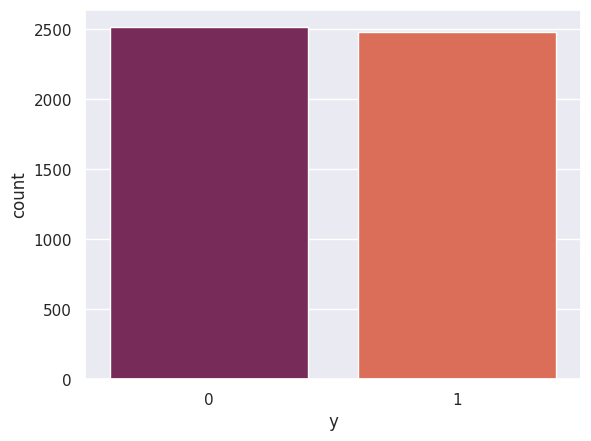

In [ ]:
sns.countplot(x='y',data=train_data, palette='rocket')
plt.show()

In [ ]:
train_data.y.value_counts(dropna = False, normalize=True)

0    0.5032
1    0.4968
Name: y, dtype: float64

Zatem zbiór jest dobrze zbilansowany (49% dla jedynek).

In [ ]:
CORREL = train_data.corr().sort_values('y')
CORREL['y']

x2   -0.110414
x0   -0.086389
x5   -0.077033
x1   -0.016340
x6   -0.001781
x7    0.006514
x3    0.009570
x4    0.010566
y     1.000000
Name: y, dtype: float64

Wektor korelacji pomiędzy zmienną zależną a zmiennymi wykazał, że zmienne mają bardzo niskie poziomy korelacji.

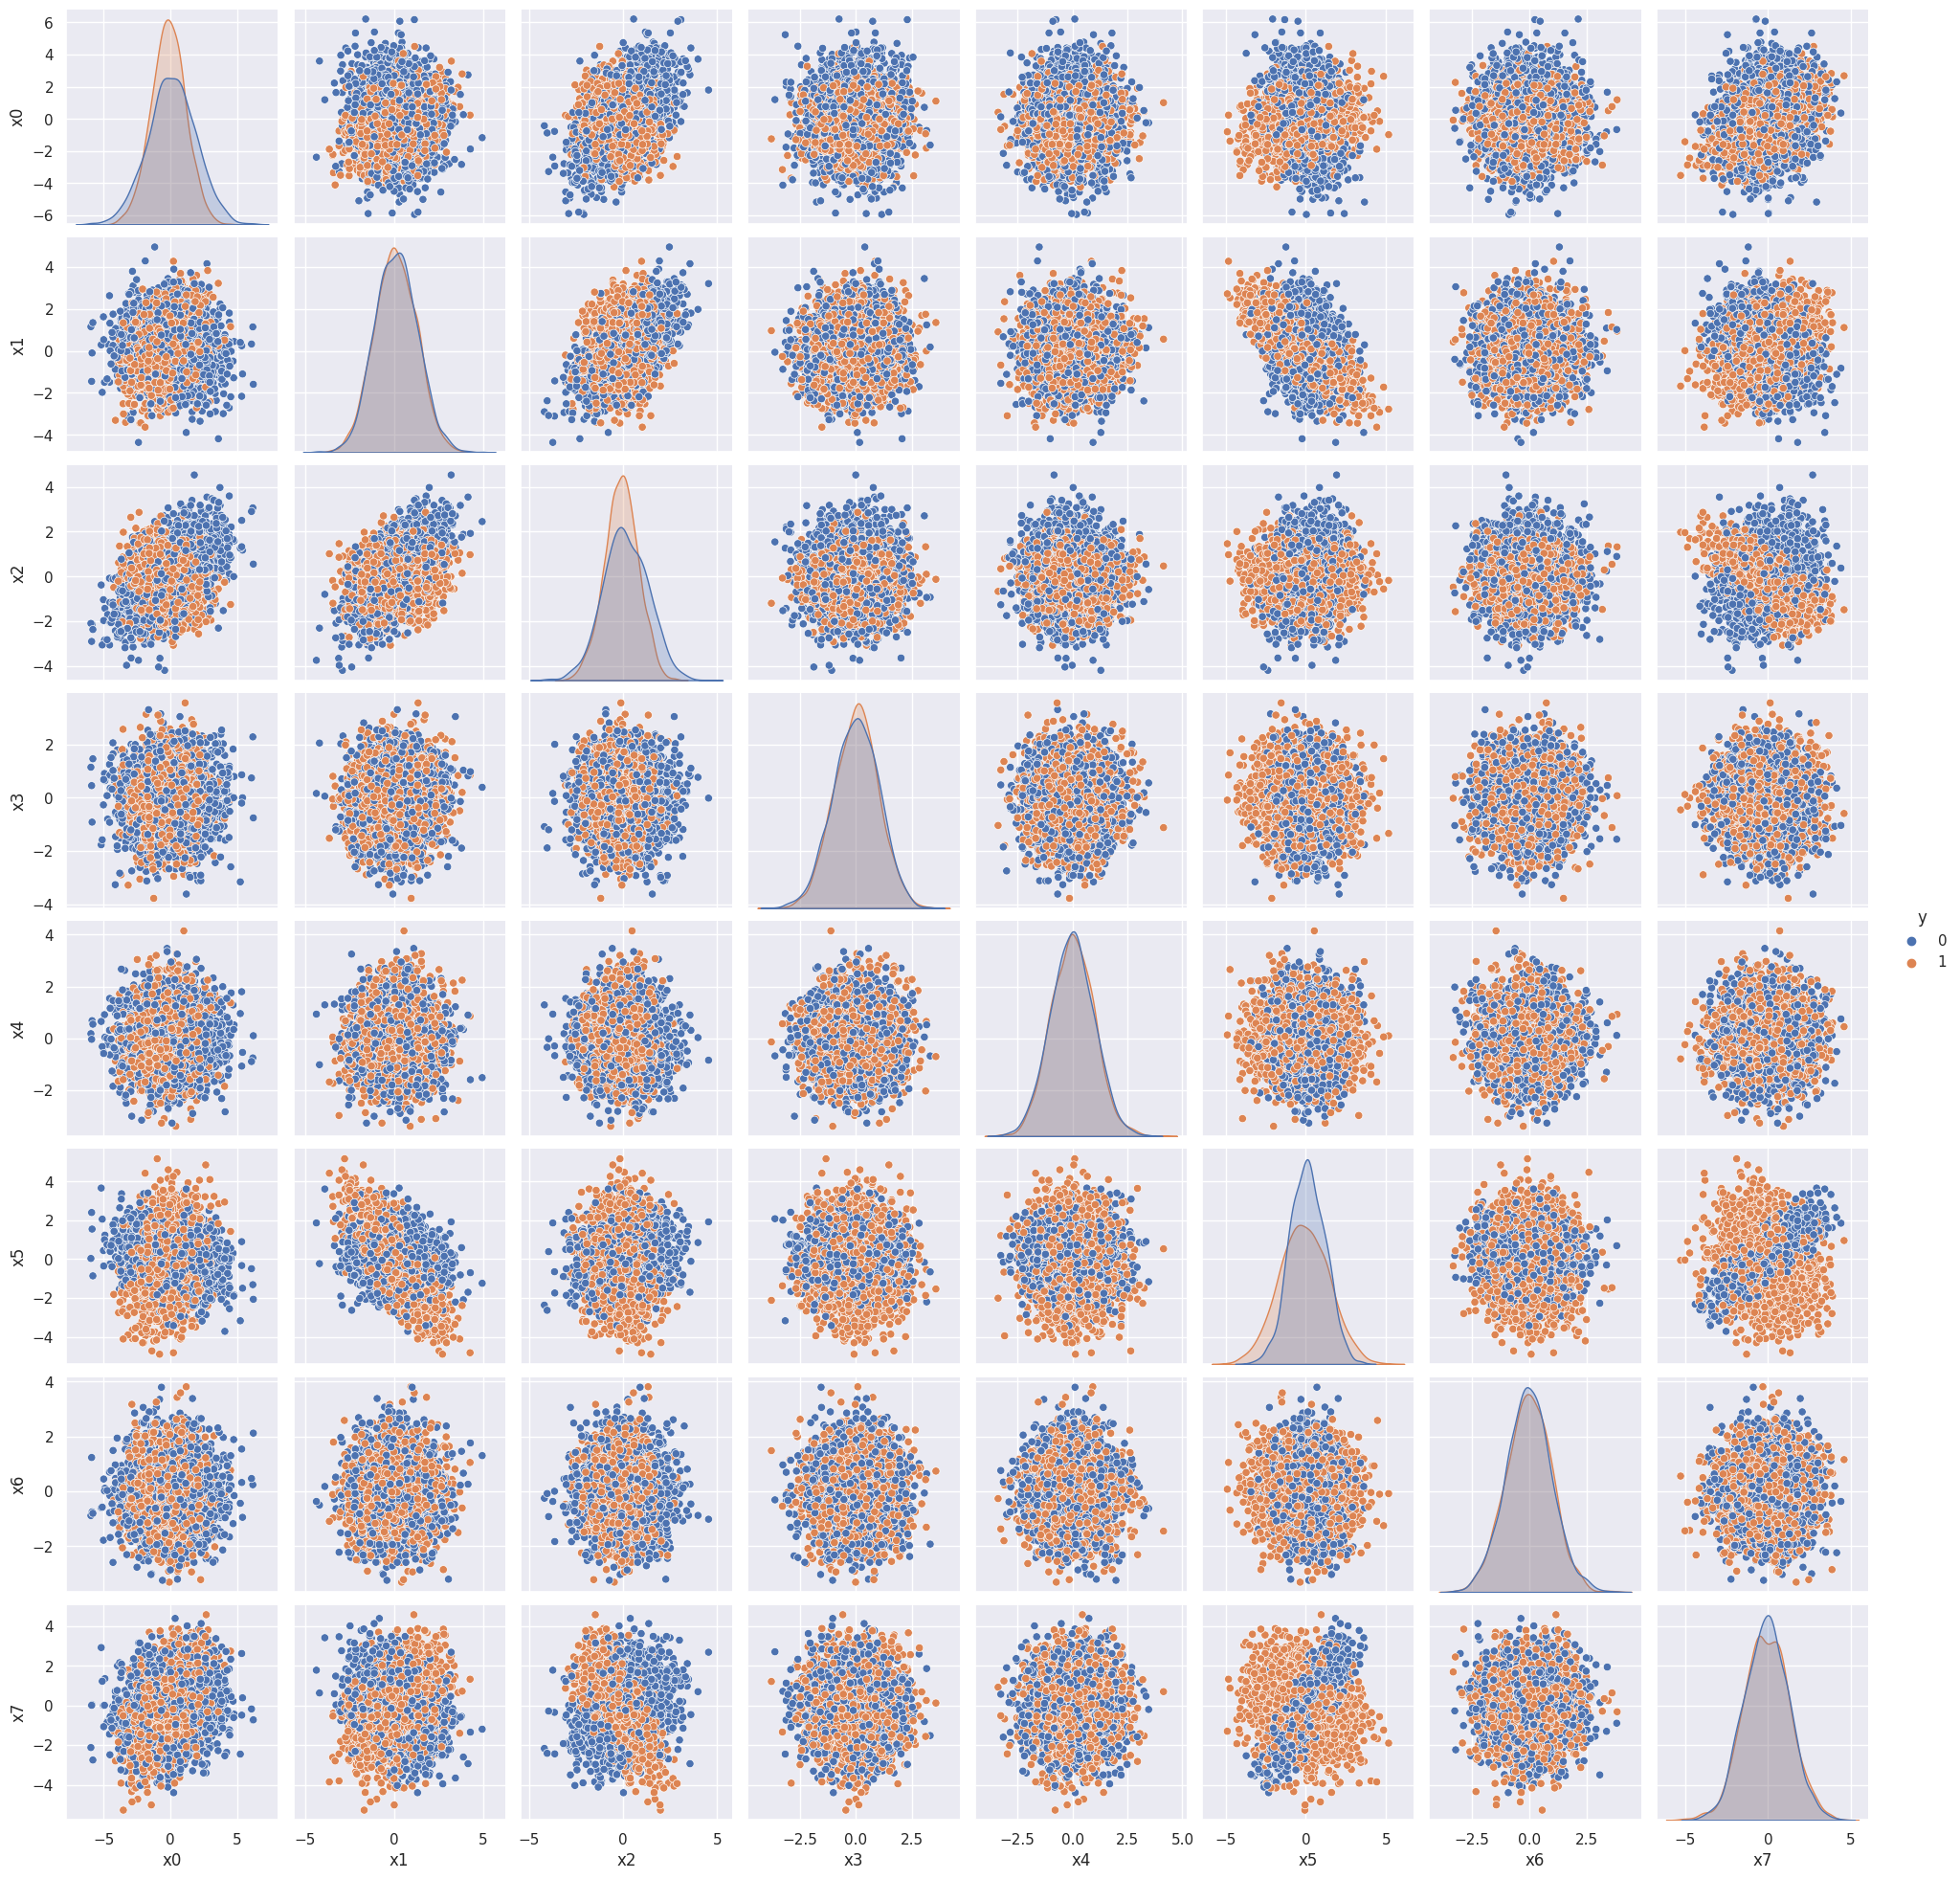

In [ ]:
sns.pairplot(train_data, hue= 'y')
plt.show()

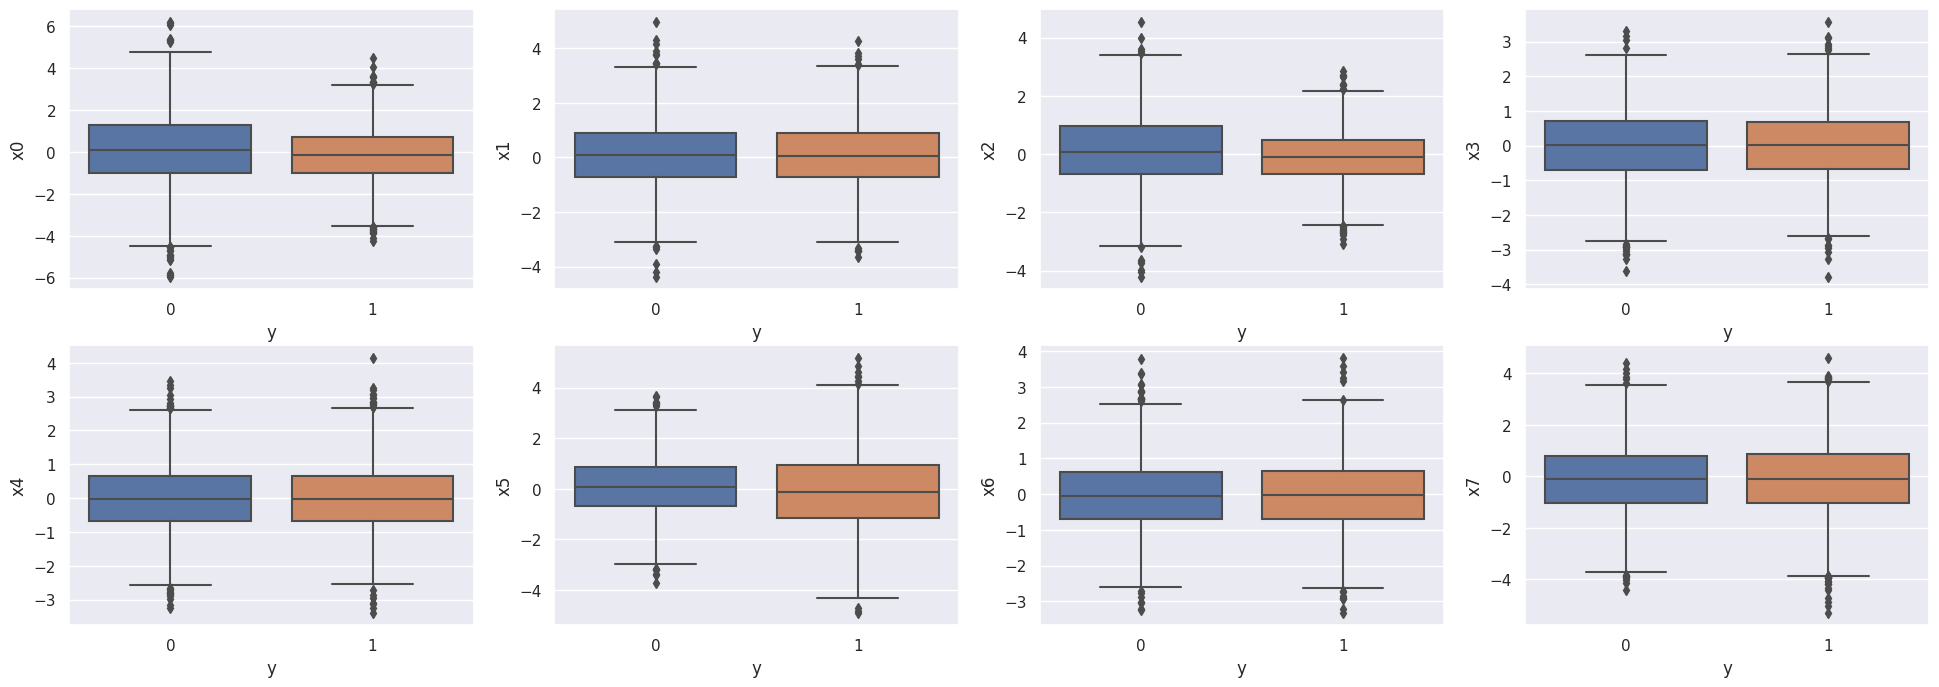

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(24, 8))

sns.boxplot(x='y', y='x0', data=train_data, ax=axes[0, 0])
sns.boxplot(x='y', y='x1', data=train_data, ax=axes[0, 1])
sns.boxplot(x='y', y='x2', data=train_data, ax=axes[0, 2])
sns.boxplot(x='y', y='x3', data=train_data, ax=axes[0, 3])
sns.boxplot(x='y', y='x4', data=train_data, ax=axes[1, 0])
sns.boxplot(x='y', y='x5', data=train_data, ax=axes[1, 1])
sns.boxplot(x='y', y='x6', data=train_data, ax=axes[1, 2])
sns.boxplot(x='y', y='x7', data=train_data, ax=axes[1, 3])

plt.show()

In [ ]:
train_data.describe(include='all')

x0           x1           x2           x3           x4  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.025490     0.094882     0.007326    -0.012188    -0.008019   
std       1.565503     1.182732     1.065688     1.007504     0.983949   
min      -5.942591    -4.360606    -4.198170    -3.774314    -3.381540   
25%      -1.016955    -0.727521    -0.690706    -0.686159    -0.676784   
50%      -0.048943     0.078397    -0.019637     0.020059    -0.012539   
75%       0.964391     0.906215     0.707119     0.679961     0.658606   
max       6.206074     4.960932     4.537608     3.563367     4.142874   

                x5           x6           x7           y  
count  5000.000000  5000.000000  5000.000000  5000.00000  
mean     -0.005865    -0.040658    -0.099685     0.49680  
std       1.341921     0.989770     1.363343     0.50004  
min      -4.889314    -3.312938    -5.283491     0.00000  
25%      -0.888520    -0.702650    -1.034400     0.00000  
50%       0.012486    -0.037490    -0.096241     0.00000  
75%       0.909795     0.614246     0.832325     1.00000  
max       5.166980     3.806473     4.592470     1.00000

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test_predictors 3.csv')
test_data.head()

x0        x1        x2        x3        x4        x5        x6  \
0 -0.675953  1.645133  0.409148 -1.197744 -0.837398 -1.097410 -0.901792   
1 -1.274686  0.415140  0.972688 -1.429581 -0.727000 -0.272929 -2.031717   
2  0.913396  1.912806 -0.107897  0.266757 -1.383683 -1.992587  0.353654   
3 -1.804208  0.299852  1.071682 -0.644186 -1.509489 -0.111689  2.504816   
4  0.130503 -0.188492 -1.176616  0.021021 -0.831936 -0.013254 -1.447654   

         x7  
0 -0.664077  
1 -0.945716  
2  2.398897  
3 -2.011371  
4  1.598697

Zbiór testowy

In [ ]:
X = train_data[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = train_data['y']

In [ ]:
X_columns= X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 44)

In [ ]:
predictors = 'x0 x1 x2 x3 x4 x5 x6 x7'.split()
#X_train = train_data.drop('y', axis=1)
#y_train = train_data['y']

Tymczasowy zbiór walidacyjny:

In [ ]:
train_data_tmp, df_val = train_test_split(train_data, test_size=.3, random_state=None)

Walidacja:

In [ ]:
models = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5)
]

for model in models:
    model.fit(train_data_tmp[predictors], train_data_tmp['y'])
    print(f'{model.__class__.__name__:.<40} {model.score(df_val[predictors], df_val["y"]):.4f}')

LogisticRegression...................... 0.5620
LinearDiscriminantAnalysis.............. 0.5620
QuadraticDiscriminantAnalysis........... 0.9493
GaussianNB.............................. 0.6407
KNeighborsClassifier.................... 0.8767


In [ ]:
models=[
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5)
]
for model in models:
    cv = cross_val_score(model, X_train, y_train, cv=5)
    score, std = np.mean(cv), np.std(cv)
    print(f'{model.__class__.__name__:.<30}{score:.3f}+-{std:.3f}')

LogisticRegression............0.542+-0.013
LinearDiscriminantAnalysis....0.542+-0.012
QuadraticDiscriminantAnalysis.0.939+-0.005
GaussianNB....................0.618+-0.018
KNeighborsClassifier..........0.870+-0.011


Widać przybliżone wyniki wraz z odchyleniami. Najlepiej wypada model QDA, następnie KNN.

Korelacje predyktorów

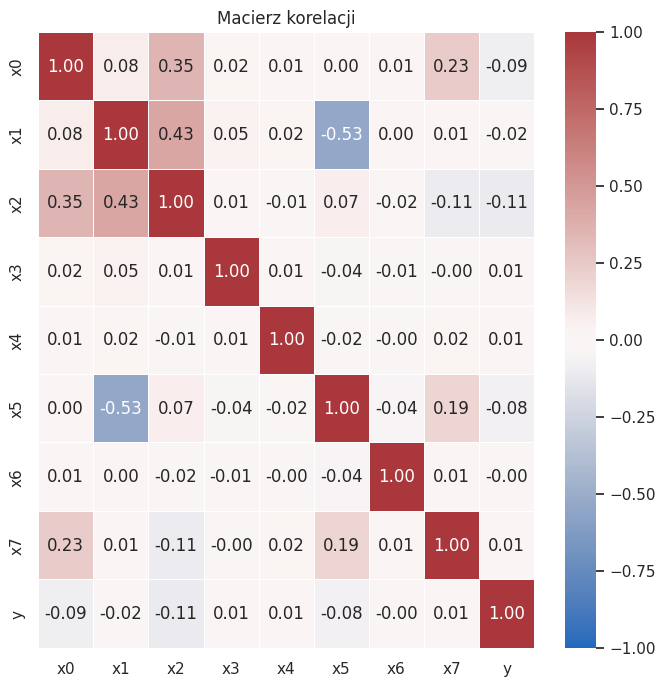

In [ ]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Macierz korelacji')
plt.show();

Z rysunku możemy odczytać, że korelacje są bardzo niskie, zatem na tej podstawie na ten moment nie jesteśmy w stanie odrzucic żadnych predyktorów. Nawet Najwyższe korelacje są niewystarczające do podjęcia takich wniosków, gdyż $|-0.53|^2|=0.28<0.7$. Jedynie możemy podejrzewać, ze względu na to, że korelacje predyktora x4 z innymi są tak słabe, że może nie być on istotny. Przekonamy się o tych podejrzeniach dalej.

**Metoda lasu losowego**

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

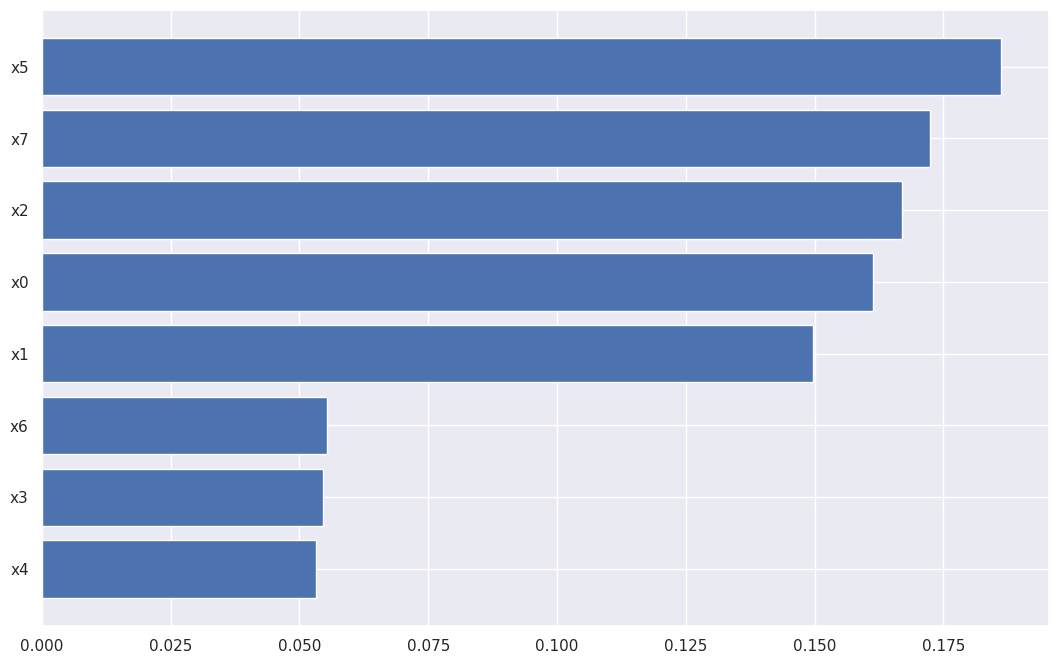

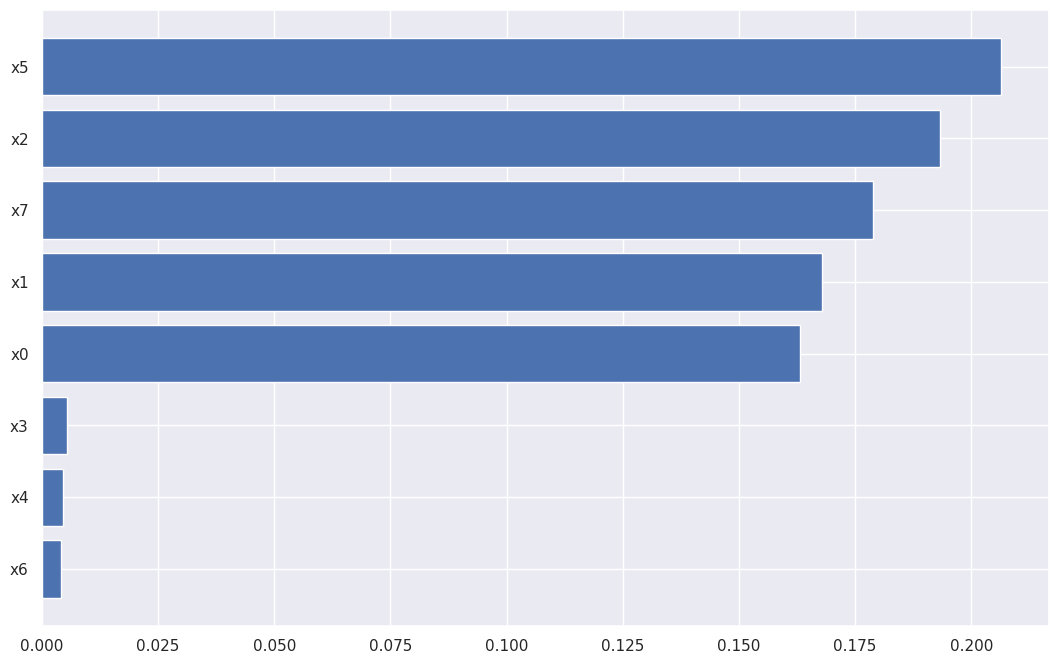

In [ ]:
n_estimators = 300

rf = RandomForestClassifier(n_estimators = n_estimators, max_features = 'sqrt',max_samples = None, max_depth = None,
                            max_leaf_nodes = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0,
                            min_impurity_decrease = 0.0, criterion = 'gini', class_weight = None, bootstrap = True,
                            random_state = 0, n_jobs = -1).fit(X,y)

#impurity-based feature importances z Gini measure
feature_importances = rf.feature_importances_
plt.figure(figsize = (13,8))
sorted_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k])
plt.barh([X_columns[i] for i in sorted_indices], [feature_importances[i] for i in sorted_indices])
plt.show()

#permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, n_jobs = -1)
feature_permutation_importances = [result.importances_mean[i] for i in range(len(X_columns))]
plt.figure(figsize = (13,8))
sorted_indices = sorted(range(len(feature_permutation_importances)), key=lambda k: feature_permutation_importances[k])
plt.barh([X_columns[i] for i in sorted_indices], [feature_permutation_importances[i] for i in sorted_indices])
plt.show()

Widoczne są trzy szumy, zatem kolumny x3, x6, x4 nie należy brać pod uwagę do dalszych badań.

In [ ]:
X_selection= X.drop(columns = ['x3','x4','x6'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_selection.columns
vif_data["VIF"] = [variance_inflation_factor(X_selection.values, i) for i in range(X_selection.shape[1])]

# Wyświetlenie wyników
print(vif_data)

  Variable       VIF
0       x0  1.313463
1       x1  2.202739
2       x2  1.869713
3       x5  1.873371
4       x7  1.265002


Współczynniki inflacji wariancji $<5$ , więć nie ma konkretnych podejrzeń co do dalszej selekcji i można wnioskować, że predyktory są poprawnie dobrane.

In [ ]:
class SelectColumns:
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

In [ ]:
for model in models:
    pipeline = make_pipeline(
        SelectColumns(['x0','x1','x2','x5','x7']),
        model
    )
    pipeline.fit(train_data_tmp[predictors], train_data_tmp['y'])
    print(f'{model.__class__.__name__:.<40} {pipeline.score(df_val[predictors], df_val["y"]):.4f}')

LogisticRegression...................... 0.5633
LinearDiscriminantAnalysis.............. 0.5640
QuadraticDiscriminantAnalysis........... 0.9473
GaussianNB.............................. 0.6440
KNeighborsClassifier.................... 0.9080


Zastosowanie potoku do tymczasowego wygenerowania podziału na zbiór treningowy i walidacyjny. Usunięcie kolumn x3,x4,x6 nieco zmieniła wyniki(szczególnie w modelu KNN).

**Walidacja krzyżowa**

Testowanie klasyfikatorów: LDA, regresji logistycznej, QDA i Naive Bayes.

In [ ]:
from itertools import combinations

models = [
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
]

best_score = 0

for model in models:
    for n_features in range(1, 6):
        for c in combinations(['x0','x1','x2','x5','x7'], n_features):
            pipeline = Pipeline(
                [
                    ("select_columns", SelectColumns(list(c))),
                    ("model", model),
                ]
            )
            cv = cross_val_score(pipeline, train_data, train_data["y"], cv=5)
            mean, std = cv.mean(), cv.std()

            if mean > best_score:
                best_score = mean
                best_std = std
                best_columns = c
                best_model = pipeline
                print(
                    f"Najlepszy wynik: {best_score:.3f} +/- {best_std:.3f} używając predyktorów {best_columns} w modelu {model.__class__.__name__}"
                )

Najlepszy wynik: 0.529 +/- 0.020 używając predyktorów ('x0',) w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.531 +/- 0.008 używając predyktorów ('x2',) w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.539 +/- 0.010 używając predyktorów ('x5',) w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.540 +/- 0.007 używając predyktorów ('x0', 'x2') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.542 +/- 0.011 używając predyktorów ('x0', 'x5') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.546 +/- 0.011 używając predyktorów ('x1', 'x5') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.550 +/- 0.006 używając predyktorów ('x2', 'x5') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.551 +/- 0.015 używając predyktorów ('x5', 'x7') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.551 +/- 0.014 używając predyktorów ('x0', 'x2', 'x5') w modelu LinearDiscriminantAnalysis
Najlepszy wynik: 0.554 +/- 0.017 używając predyktorów ('x0', 'x5', 'x7') w modelu 

Najlepszy wynik daje QDA ze wszystkimi predyktorami x0, x1, x2, x5, x7.

In [ ]:
best_score = 0

for n_neighbors in range(100, 0, -2):
    for n_features in range(1, 6):
        for c in combinations(['x0','x1','x2','x5','x7'], n_features):
            pipeline = Pipeline(
                [
                    ("select_columns", SelectColumns(list(c))),
                    ("model", KNeighborsClassifier(n_neighbors=n_neighbors)),
                ]
            )
            cv = cross_val_score(pipeline, train_data, train_data["y"], cv=5)
            mean, std = cv.mean(), cv.std()

            if mean > best_score:
                best_score = mean
                best_std = std
                best_columns = c
                best_model = pipeline
                print(
                    f"Najlepszy wynik: {best_score:.3f} +/- {best_std:.3f} używając predyktorów{best_columns} i {n_neighbors} sąsiadów"
                )

Best score: 0.577 +/- 0.018 using ('x0',) and 100 neighbors
Best score: 0.581 +/- 0.010 using ('x5',) and 100 neighbors
Best score: 0.606 +/- 0.007 using ('x0', 'x1') and 100 neighbors
Best score: 0.633 +/- 0.017 using ('x0', 'x2') and 100 neighbors
Best score: 0.636 +/- 0.008 using ('x1', 'x5') and 100 neighbors
Best score: 0.682 +/- 0.013 using ('x2', 'x7') and 100 neighbors
Best score: 0.728 +/- 0.008 using ('x5', 'x7') and 100 neighbors
Best score: 0.762 +/- 0.008 using ('x0', 'x1', 'x5') and 100 neighbors
Best score: 0.772 +/- 0.009 using ('x0', 'x5', 'x7') and 100 neighbors
Best score: 0.774 +/- 0.005 using ('x2', 'x5', 'x7') and 100 neighbors
Best score: 0.857 +/- 0.006 using ('x0', 'x1', 'x2', 'x5') and 100 neighbors
Best score: 0.905 +/- 0.007 using ('x0', 'x1', 'x2', 'x5', 'x7') and 100 neighbors
Best score: 0.905 +/- 0.008 using ('x0', 'x1', 'x2', 'x5', 'x7') and 98 neighbors
Best score: 0.906 +/- 0.008 using ('x0', 'x1', 'x2', 'x5', 'x7') and 96 neighbors
Best score: 0.907 

Najlepiej prezentuje się KNN z x0,x1,x2,x5,x7 oraz 16 sąsiadami.
Mimo wszystko największą dokładność klasywikacji daje QDA.

Podsumowując wszystkie wyniki wychodzi na to, że model QDA jest najlepszy i ma $94,2$% dokładności, a zatem to jego wykorzystamy do klasyfikacji danych na zbiorze testowym z pliku predictors.

In [ ]:
qda = Pipeline(
    [
        ("select_columns", SelectColumns(['x0','x1','x2','x5','x7'])),
        ("model", QuadraticDiscriminantAnalysis(store_covariance=True)),
    ]
)
qda.fit(train_data, train_data["y"])

Pipeline(steps=[('select_columns',
                 <__main__.SelectColumns object at 0x784dfdc30250>),
                ('model',
                 QuadraticDiscriminantAnalysis(store_covariance=True))])

In [ ]:
qda.named_steps["model"].means_

array([[ 0.10887654,  0.11408185,  0.12422952,  0.09683715, -0.10850806],
       [-0.16158669,  0.07543418, -0.11108438, -0.10988986, -0.09074761]])

In [ ]:
qda.named_steps["model"].covariance_

[array([[ 3.20276394, -0.18633383,  1.17077772, -0.45043451,  0.31702523],
        [-0.18633383,  1.42632946,  0.87508432, -0.3140957 , -0.46042717],
        [ 1.17077772,  0.87508432,  1.4370646 ,  0.2088313 ,  0.41441215],
        [-0.45043451, -0.3140957 ,  0.2088313 ,  1.20644966,  1.11039818],
        [ 0.31702523, -0.46042717,  0.41441215,  1.11039818,  1.78216381]]),
 array([[ 1.65330833,  0.47375465, -0.0505585 ,  0.43174564,  0.69045906],
        [ 0.47375465,  1.37083787,  0.19645139, -1.38683624,  0.48815189],
        [-0.0505585 ,  0.19645139,  0.80301458, -0.04257763, -0.73274829],
        [ 0.43174564, -1.38683624, -0.04257763,  2.38192607, -0.41206331],
        [ 0.69045906,  0.48815189, -0.73274829, -0.41206331,  1.93682005]])]

In [ ]:
model_final = make_pipeline(
    SelectColumns(['x0', 'x1','x2','x5','x7']),
     QuadraticDiscriminantAnalysis()
)

model_final.fit(train_data, train_data['y'])


Pipeline(steps=[('selectcolumns',
                 <__main__.SelectColumns object at 0x784dfdc33a00>),
                ('quadraticdiscriminantanalysis',
                 QuadraticDiscriminantAnalysis())])

In [ ]:
y_pred = model_final.predict(test_data)


In [ ]:
print(y_pred)

[0 1 1 ... 0 1 1]


In [ ]:
predictions_df = pd.DataFrame({'y': y_pred})
predictions_df.to_csv('predictions.csv', index=False)

Moja hipoteza wygląda następująco:
*   n_informative= 5
*   n_redundant + n_repeated= 3
*   n_noise= 0

